# Plotting the TKE and turbulence results #
Note: B1 (the 4th level) doesn't have data due to bad quality

In [13]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os.path
import pickle
import time
from matplotlib.pyplot import figure
import scipy.io as sio

IN_DIRECTORY = "/projectnb/urbanclimate/yueqin/idaho_ec_jupyter/basic_processed_data/"
IN_DIRECTORY2 = "/projectnb/urbanclimate/yueqin/idaho_ec_jupyter/processeddata/"
OUT_DIRECTORY = "/projectnb/urbanclimate/yueqin/idaho_ec_jupyter/fig/"
in_var=['H','E','LE','u_star','T_star','L','L_H2','L_q2','TKE']
list_col = ['C1','C2','C3','C4','B1','B2','B3','B4','A1','A2','A3','A4']

In [2]:
def create_df(inpt):
#     DateTime = pd.date_range(start=cdatetime+' 0:0', end=cdatetime+' 23:0', periods=24)
    df = pd.DataFrame(inpt, columns=list_col).copy()
    df.index = DateTime
    return df
def create_ins_df(inpt):
    df = pd.DataFrame(inpt, columns=list_col).copy()
    df['DateTime'] = ts
    return df
def strcture(inpt,ind):
#     skip = round(rpat/num)
    num = len(ind)
    D2 = np.zeros((num,sonum))+np.nan
    r = np.zeros((num,sonum))+np.nan
    var_mean = np.nanmean(inpt.iloc[:,0:12].to_numpy(),0)
    for j in range(num):
        cov = (inpt.iloc[0:(rpat-ind[j]),0:12].to_numpy()-inpt.iloc[ind[j]:rpat,0:12].to_numpy())**2
        D2[j,:] = np.nanmean(cov,0)
        r[j,:]=ind[j]*var_mean/frequency
#         print(np.nanmean(inpt.iloc[:,0:12].to_numpy(),0))
    D2_df = pd.DataFrame(D2, columns=list_col).copy()
    r_df = pd.DataFrame(r, columns=list_col).copy()
    return D2_df,r_df

In [3]:
sonum    =12                       # number of sonic
z        =[1.2,2,3.5,6,8.2,12.8,15.8,23,30.3,40.2,50.6,60.5];                 # height of sonic above ground, m
frequency=10                   # sampling frequency, Hz
time_avg =3600                  # average time, s
rpat = time_avg*frequency           # number of lines for a loop
do_saving = 1

# Load fluxes data and TKE

In [6]:
%%time
yrs = [2021]
month= [4]
dys  = [22,23]
# yrs = [2020,2021]
# month= list(range(1,13))
# dys  = list(range(1,32))
t_id = 0
for yr in range(len(yrs)):
    cyr = str(yrs[yr])
    for mn in range(len(month)): # loop for month
        for dy in range(len(dys)): # loop for day 
            start = time.time()
            if month[mn] < 10:
                cmonth = '0'+ str(month[mn])
            else:
                cmonth = str(month[mn])
#         print('month='+ cmonth)
            if dys[dy] < 10:
                cdys = '0'+ str(dys[dy])
            else:
                cdys = str(dys[dy]) 
            fp_stats = IN_DIRECTORY + 'u_ins_' + cyr + cmonth + cdys +'.pkl'
            if (not os.path.isfile(fp_stats)):
#                 print(cyr + cmonth + cdys+' do not exist')
                continue
            else:
                print('start processing:'+ cyr + cmonth + cdys)
                for var in in_var:
                    a_file = open(IN_DIRECTORY + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
                    globals()[var] = pickle.load(a_file)    
                    a_file.close()
#                     print('load:'+var) 
                cdatetime = cyr +'-' + cmonth +'-'+cdys
                st_datetime = pd.Timestamp(yrs[yr],month[mn],dys[dy],0)
                ed_datetime = pd.Timestamp(yrs[yr],month[mn],dys[dy],23)
                DateTime = pd.date_range(start=st_datetime, end=ed_datetime, periods=24)
                if (t_id == 0):
                    TKE_df=create_df(TKE)
                    H_df=create_df(H)
                    E_df=create_df(E)
                    LE_df=create_df(LE)
                    u_star_df=create_df(u_star)
                    T_star_df=create_df(T_star)
                    L_df=create_df(L)
                    L_H2_df=create_df(L_H2)
                    L_q2_df=create_df(L_q2)
                else:
                    TKE_df=TKE_df.append(create_df(TKE))
                    H_df=H_df.append(create_df(H))
                    E_df=E_df.append(create_df(E))
                    LE_df=LE_df.append(create_df(LE))
                    u_star_df=u_star_df.append(create_df(u_star))
                    T_star_df=T_star_df.append(create_df(T_star))
                    L_df=L_df.append(create_df(L))
                    L_H2_df=L_H2_df.append(create_df(L_H2))
                    L_q2_df=L_q2_df.append(create_df(L_q2))
                print('finish processing:'+ cyr + cmonth + cdys)
                t_id += 1

start processing:20210422
finish processing:20210422
start processing:20210423
finish processing:20210423
CPU times: user 251 ms, sys: 105 ms, total: 356 ms
Wall time: 1.4 s


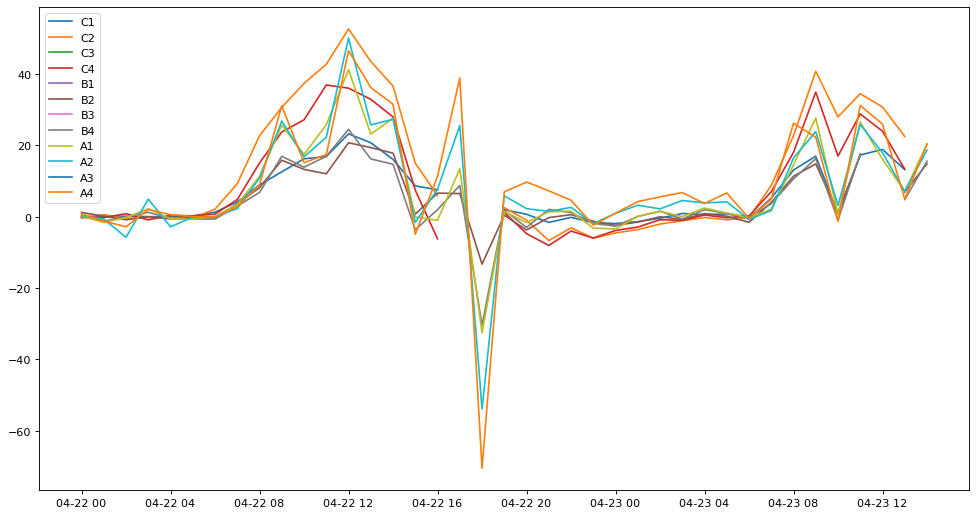

In [15]:
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(LE_df)
plt.legend(list_col)

In [10]:
u_star_df[u_star_df.index=='2020-9-20 08:00:00']

,C1,C2,C3,C4,B1,B2,B3,B4,A1,A2,A3,A4
2020-09-20 08:00:00,0.135633,0.136976,0.14549,0.1045,NaN,0.182116,0.171789,0.195241,0.182145,0.231332,0.289252,0.300902


# Load turbulence data and quality flags for one day in particular

In [11]:
%%time
ins_var=['u_ins','v_ins','w_ins','q_ins','C_ins','T_ins']
tur_var=['u_tur','v_tur','w_tur','q_tur','C_tur','T_tur']
flg_var=['diag_csat_ins','sig_irga_ins']
yrs = [2020]
# month= [11]
# dys  = [24]
month = [9]
dys = [20]
t_id = 0
for yr in range(len(yrs)):
    cyr = str(yrs[yr])
    for mn in range(len(month)): # loop for month
        for dy in range(len(dys)): # loop for day 
            start = time.time()
            if month[mn] < 10:
                cmonth = '0'+ str(month[mn])
            else:
                cmonth = str(month[mn])
#         print('month='+ cmonth)
            if dys[dy] < 10:
                cdys = '0'+ str(dys[dy])
            else:
                cdys = str(dys[dy]) 
            fp_stats = IN_DIRECTORY + 'u_ins_' + cyr + cmonth + cdys +'.pkl'
            if (not os.path.isfile(fp_stats)):
#                 print(cyr + cmonth + cdys+' do not exist')
                continue
            else:
                print('start processing:'+ cyr + cmonth + cdys)
                # load turbulence
                for var in ins_var: 
                    a_file = open(IN_DIRECTORY + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
                    globals()[var] = pickle.load(a_file)    
                    a_file.close()
                for var in tur_var: 
                    a_file = open(IN_DIRECTORY + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
                    globals()[var] = pickle.load(a_file)    
                    a_file.close()
                # load quality flags
                for var in flg_var:
                    a_file = open(IN_DIRECTORY2 + var +'_' + cyr + cmonth + cdys +'.pkl', "rb")
                    globals()[var] = pickle.load(a_file)    
                    a_file.close()
                cdatetime = cyr +'-' + cmonth +'-'+cdys
                st_datetime = pd.Timestamp(yrs[yr],month[mn],dys[dy],0)
                ed_datetime = pd.Timestamp(yrs[yr],month[mn],dys[dy],23)
                DateTime = pd.date_range(start=st_datetime, end=ed_datetime, periods=24)
                ts = np.repeat(DateTime,36000)
                if (t_id == 0):
                    u_ins_df = create_ins_df(u_ins)
                    v_ins_df = create_ins_df(v_ins)
                    w_ins_df = create_ins_df(w_ins)
                    u_tur_df = create_ins_df(u_tur)
                    v_tur_df = create_ins_df(v_tur)
                    w_tur_df = create_ins_df(w_tur)
                    T_tur_df = create_ins_df(T_tur)
                    diag_csat_df = create_ins_df(diag_csat_ins)

start processing:20200920
CPU times: user 796 ms, sys: 1.23 s, total: 2.02 s
Wall time: 4.25 s


In [12]:
u_tur_df

,C1,C2,C3,C4,B1,B2,B3,B4,A1,A2,A3,A4,DateTime
0,0.384581,0.495991,0.164487,0.332885,NaN,-0.415425,-0.308418,-0.260944,-0.131800,-0.052248,-0.035054,0.388208,2020-09-20 00:00:00
1,0.472040,0.507120,0.221221,0.253570,NaN,-0.473331,-0.108551,-0.188778,-0.110315,-0.000460,-0.036899,0.424173,2020-09-20 00:00:00
2,0.431078,0.485802,0.174572,0.286660,NaN,-0.463082,-0.234741,-0.136823,-0.179066,0.009243,-0.069748,0.361457,2020-09-20 00:00:00
3,0.467508,0.438082,0.214009,0.161228,NaN,-0.551647,-0.052633,-0.250705,-0.292672,0.014083,-0.064062,0.379076,2020-09-20 00:00:00
4,0.495916,0.486420,0.324019,0.067242,NaN,-0.580615,-0.126664,-0.279564,-0.091061,0.002617,-0.053875,0.331257,2020-09-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863995,0.159674,0.457190,0.320856,0.696337,NaN,0.055423,0.226244,-0.003869,-0.163523,-0.289453,-0.153154,-0.088850,2020-09-20 23:00:00
863996,0.083137,0.368495,0.340924,0.475006,NaN,0.100921,0.109630,0.045330,-0.131705,-0.247230,-0.103548,-0.003668,2020-09-20 23:00:00
863997,0.059997,0.384084,0.344852,0.636391,NaN,0.246262,0.063119,-0.017259,-0.164725,-0.245178,-0.141884,-0.003219,2020-09-20 23:00:00
863998,0.131603,0.340416,0.242580,0.599948,NaN,0.171874,0.132656,-0.032186,-0.157230,-0.175234,-0.161034,-0.046111,2020-09-20 23:00:00


In [46]:
diag_csat_df[u_tur_df['DateTime']=='2020-11-24 08:00:00']

,C1,C2,C3,C4,B1,B2,B3,B4,A1,A2,A3,A4,DateTime
288000,1.0,0.0,1.0,16.0,53265.0,1.0,16.0,5.0,13.0,5.0,13.0,13.0,2020-11-24 08:00:00
288001,0.0,0.0,1.0,16.0,36882.0,1.0,13.0,5.0,13.0,1.0,12.0,13.0,2020-11-24 08:00:00
288002,0.0,0.0,5.0,16.0,53267.0,1.0,13.0,5.0,13.0,1.0,4.0,13.0,2020-11-24 08:00:00
288003,1.0,0.0,1.0,16.0,36884.0,1.0,13.0,5.0,13.0,1.0,5.0,9.0,2020-11-24 08:00:00
288004,0.0,0.0,5.0,16.0,53269.0,1.0,13.0,5.0,13.0,1.0,4.0,9.0,2020-11-24 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323995,13.0,0.0,9.0,16.0,61503.0,1.0,16.0,16.0,16.0,16.0,5.0,16.0,2020-11-24 08:00:00
323996,9.0,0.0,13.0,16.0,61503.0,1.0,16.0,16.0,16.0,16.0,5.0,16.0,2020-11-24 08:00:00
323997,13.0,0.0,9.0,16.0,61503.0,1.0,16.0,16.0,16.0,16.0,5.0,16.0,2020-11-24 08:00:00
323998,9.0,0.0,9.0,16.0,61503.0,1.0,16.0,16.0,16.0,16.0,5.0,16.0,2020-11-24 08:00:00


In [54]:
print(u_tur_df.loc[307646])
print(v_tur_df.loc[307646])
print(w_tur_df.loc[307646])
print(diag_csat_df.loc[307646])

C1                      814.953
C2                    -0.309612
C3                          NaN
C4                          NaN
B1                          NaN
B2                      -1.5902
B3                          NaN
B4                          NaN
A1                          NaN
A2                          NaN
A3                      0.48154
A4                          NaN
DateTime    2020-11-24 08:00:00
Name: 307646, dtype: object
C1                      164.797
C2                   -0.0114696
C3                          NaN
C4                          NaN
B1                          NaN
B2                     -2.19146
B3                          NaN
B4                          NaN
A1                          NaN
A2                          NaN
A3                    0.0510432
A4                          NaN
DateTime    2020-11-24 08:00:00
Name: 307646, dtype: object
C1                     -26.8483
C2                     0.045987
C3                          NaN
C4              

## calculate structure function and plot

In [31]:
# u
# r[j-1,:]=j*skip*np.nanmean(inpt.iloc[:,0:12].to_numpy(),0)/frequency
hour = '2020-9-20 00:00:00'
u_sel = u_ins_df[u_ins_df['DateTime']==hour]
n_r = 200
logr = np.logspace(-2,2,num=n_r)
r_init = np.transpose(np.tile(logr,(sonum,1)))*z # creat logarithmiclly space for r
u_mean = np.nanmean(u_sel.iloc[:,0:12].to_numpy(),0)
j_r = np.round(r_init/u_mean*frequency)
D_u_2,r = strcture(u_sel,j_r)
print(r)

# plot structure function of u velocity
name = "Structure Function"
ldg = ['C1','C2','C3','C4','B1','B2','B3','B4','A1','A2','A3','A4']
plt.figure(figsize=(15, 8), dpi=80)
plt.semilogx(r,D_u_2)
plt.legend(ldg, fontsize = 12)
plt.title(name,fontsize=20)
plt.xlabel("r",fontsize=16)
plt.ylabel("$D_u(r)$",fontsize=16)
f=plt.gcf()
plt.show()

# # v
# v_sel = v_tur_df[v_tur_df['DateTime']==hour]
# D_v_2,r = strcture(v_sel,n_r)
# plt.figure(figsize=(15, 8), dpi=80)
# plt.semilogx(r.drop(['B1'],1),D_v_2.drop(['B1'],1))
# plt.legend(ldg, fontsize = 12)
# plt.title(name,fontsize=20)
# plt.xlabel("r",fontsize=16)
# plt.ylabel("$D_v(r)$",fontsize=16)
# f=plt.gcf()
# plt.show()

# # w
# w_sel = w_tur_df[w_tur_df['DateTime']==hour]
# D_w_2,r = strcture(w_sel,n_r)
# plt.figure(figsize=(15, 8), dpi=80)
# plt.semilogx(r.drop(['B1'],1),D_w_2.drop(['B1'],1))
# plt.legend(ldg, fontsize = 12)
# plt.title(name,fontsize=20)
# plt.xlabel("r",fontsize=16)
# plt.ylabel("$D_w(r)$",fontsize=16)
# f=plt.gcf()
# plt.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [[35998. 35998. 35998. 35999.    nan 35999. 35999. 35999. 35999. 35998.
 35998. 35998.]] of <class 'numpy.ndarray'>

In [49]:
# r = np.repeat(np.logspace(-2,4,num=n_r),sonum,1)*z
logr = np.logspace(-2,2,num=80)
r = np.transpose(np.tile(logr,(sonum,1)))*z
np.shape(r)
u_mean = np.nanmean(u_sel.iloc[:,0:12].to_numpy(),0)
j = np.round(r/u_mean*frequency)
print(np.nanmax(j))
j[:,0]

19321.0


array([2.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00,
       3.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00, 6.0000e+00,
       6.0000e+00, 7.0000e+00, 8.0000e+00, 9.0000e+00, 1.0000e+01,
       1.1000e+01, 1.2000e+01, 1.4000e+01, 1.6000e+01, 1.8000e+01,
       2.0000e+01, 2.2000e+01, 2.5000e+01, 2.8000e+01, 3.2000e+01,
       3.6000e+01, 4.0000e+01, 4.5000e+01, 5.1000e+01, 5.7000e+01,
       6.4000e+01, 7.2000e+01, 8.1000e+01, 9.1000e+01, 1.0200e+02,
       1.1400e+02, 1.2800e+02, 1.4400e+02, 1.6200e+02, 1.8200e+02,
       2.0500e+02, 2.3000e+02, 2.5900e+02, 2.9100e+02, 3.2600e+02,
       3.6700e+02, 4.1200e+02, 4.6300e+02, 5.2000e+02, 5.8500e+02,
       6.5700e+02, 7.3800e+02, 8.3000e+02, 9.3200e+02, 1.0480e+03,
       1.1770e+03, 1.3230e+03, 1.4860e+03, 1.6700e+03, 1.8770e+03,
       2.1090e+03, 2.3690e+03, 2.6620e+03, 2.9920e+03, 3.3610e+03,
       3.7770e+03, 4.2440e+03, 4.7690e+03, 5.3590e+03, 6.0210e+03,
       6.7660e+03, 7.6030e+03, 8.5430e+03, 9.5990e+03, 1.0786e

In [4]:
# TKE_df[TKE_df["2020-10-04"].index[0]]
tt1 = pd.Timestamp('2020-10-04 00:00:00')
tt2 = pd.Timestamp('2020-10-04 23:00:00')
TKE_df[tt1:tt2]

,C1,C2,C3,C4,B1,B2,B3,B4,A1,A2,A3,A4
2020-10-04 00:00:00,0.092367,0.161399,0.222326,0.239331,0.233549,0.285333,0.307230,0.315109,0.343014,0.410925,0.518811,0.674615
2020-10-04 01:00:00,0.248682,0.381633,0.489246,0.518374,0.531860,0.489582,0.442842,0.382869,0.347997,0.280687,0.285666,0.262148
2020-10-04 02:00:00,0.083242,0.109441,0.149684,0.148856,0.127096,0.117730,0.118140,0.159242,0.179263,0.177338,0.182483,0.186263
2020-10-04 03:00:00,0.058329,0.090942,0.104765,0.120429,0.081877,0.093187,0.113759,0.168410,0.189573,0.222441,0.229596,0.208724
2020-10-04 04:00:00,0.048460,0.061458,0.090181,0.101413,0.072532,0.047143,0.052234,0.055032,0.058952,0.079431,0.056722,0.081767
2020-10-04 05:00:00,0.076728,0.110823,0.207280,0.271739,0.323685,0.398368,0.423898,0.426689,0.446357,0.316254,0.177437,0.067919
2020-10-04 06:00:00,0.106612,0.179891,0.289897,0.319739,0.322295,0.194288,0.118708,0.098700,0.117543,0.104166,0.100368,0.081825
2020-10-04 07:00:00,0.040075,0.042852,0.049678,0.059793,0.059006,0.066277,0.057233,0.081424,0.088133,0.076950,0.069843,0.069779
2020-10-04 08:00:00,0.279244,0.312497,0.369888,0.384807,0.377285,0.376506,0.376312,0.369846,0.370736,0.373341,0.350365,0.326617
2020-10-04 09:00:00,0.340794,0.383383,0.433397,0.452918,0.442964,0.458211,0.464508,0.455710,0.446565,0.447043,0.411330,0.379434


In [15]:
a = TKE_df["2020-10-04":"2020-10-05"]
# mask1 = np.logical_and(a>=100, a!=np.nan)
print(a)

                           C1        C2        C3        C4  B1        B2  \
2020-10-04 00:00:00  0.092367  0.161399  0.222326  0.239331 NaN  0.285333   
2020-10-04 01:00:00  0.248682  0.381633  0.489246  0.518374 NaN  0.489582   
2020-10-04 02:00:00  0.083242  0.109441  0.149684  0.148856 NaN  0.117730   
2020-10-04 03:00:00  0.058329  0.090942  0.104765  0.120429 NaN  0.093187   
2020-10-04 04:00:00  0.048460  0.061458  0.090181  0.101413 NaN  0.047143   
2020-10-04 05:00:00  0.076728  0.110823  0.207280  0.271739 NaN  0.398368   
2020-10-04 06:00:00  0.106612  0.179891  0.289897  0.319739 NaN  0.194288   
2020-10-04 07:00:00  0.040075  0.042852  0.049678  0.059793 NaN  0.066277   
2020-10-04 08:00:00  0.279244  0.312497  0.369888  0.384807 NaN  0.376506   
2020-10-04 09:00:00  0.340794  0.383383  0.433397  0.452918 NaN  0.458211   
2020-10-04 10:00:00  0.462846  0.539998  0.630815  0.635166 NaN  0.684181   
2020-10-04 11:00:00  0.546881  0.615026  0.726019  0.743652 NaN  0.769842   

In [20]:
b=H_df["2020"]
b.loc['2020-11-24 08:00:00']
# b[b['C1']>=700]

C1    -6765.168819
C2       12.229600
C3             NaN
C4             NaN
B1             NaN
B2    -9361.844089
B3             NaN
B4             NaN
A1             NaN
A2             NaN
A3   -13953.566422
A4             NaN
Name: 2020-11-24 08:00:00, dtype: float64

In [23]:
MAT = sio.loadmat(IN_DIRECTORY+'2020.mat')
np.max(MAT['TKET'] - TKE_df["2020"])

C1    3.552714e-13
C2    4.298784e-13
C3    1.307399e-12
C4    3.943512e-13
B1    2.387424e-12
B2    7.105427e-14
B3    1.350031e-13
B4    1.669775e-13
A1    6.110668e-13
A2    3.865352e-12
A3    6.821210e-13
A4    1.534772e-12
dtype: float64

In [138]:
TKE_df.loc["2020-10-04 00:00:00"]

C1    0.092367
C2    0.161399
C3    0.222326
C4    0.239331
B1    0.233549
B2    0.285333
B3    0.307230
B4    0.315109
A1    0.343014
A2    0.410925
A3    0.518811
A4    0.674615
Name: 2020-10-04 00:00:00, dtype: float64

In [8]:
def plotNsave(name,ts_df,y_lim):
    """ for ploting time series and saving them"""
    plt.figure(figsize=(15, 8), dpi=80)
    plt.plot(ts_df)
    plt.ylim(y_lim)
    plt.legend(list_col)
    plt.title(name,fontsize=20)
    f=plt.gcf()
    plt.show()
    # f.savefig(OUT_DIRECTORY+name+'.png')
    

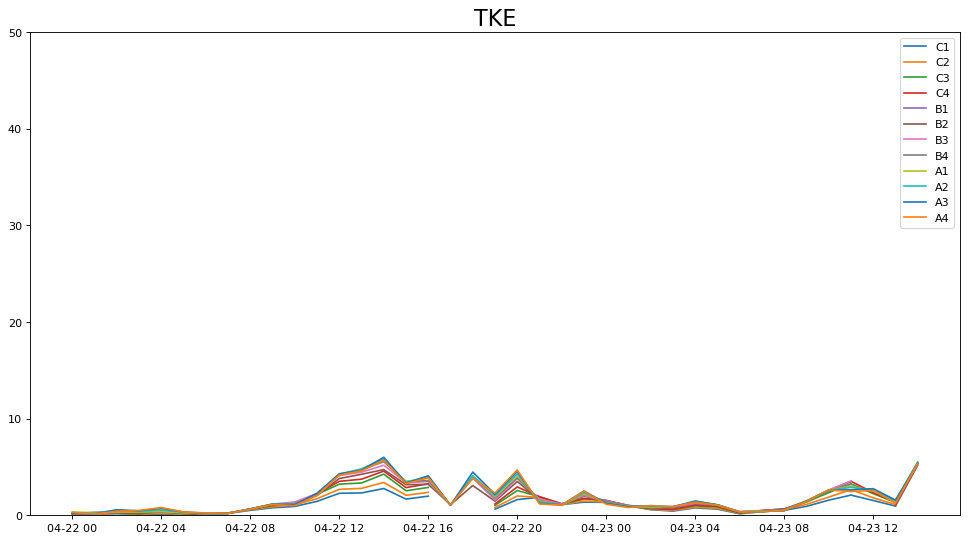

FileNotFoundError: [Errno 2] No such file or directory: '/projectnb/urbanclimate/yueqin/idaho_ec_jupyter/fig/TKE.png'

In [10]:
plotNsave("TKE",TKE_df["2021"],[0,50])
plotNsave("H",H_df["2021"],[-1000,1000])
plotNsave("LE",LE_df["2021"],[-1000,1000])

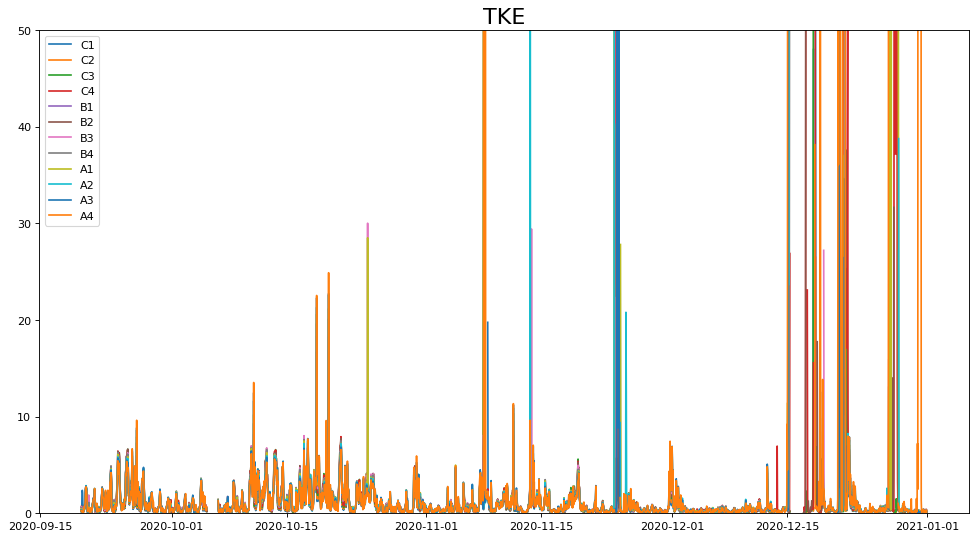

In [5]:
plt.figure(figsize=(15, 8), dpi=80)
# a = TKE_df
plt.plot(TKE_df['2020'])
plt.ylim([0,50])
plt.legend(list_col)
plt.title("TKE",fontsize=20)
f=plt.gcf()
plt.show()

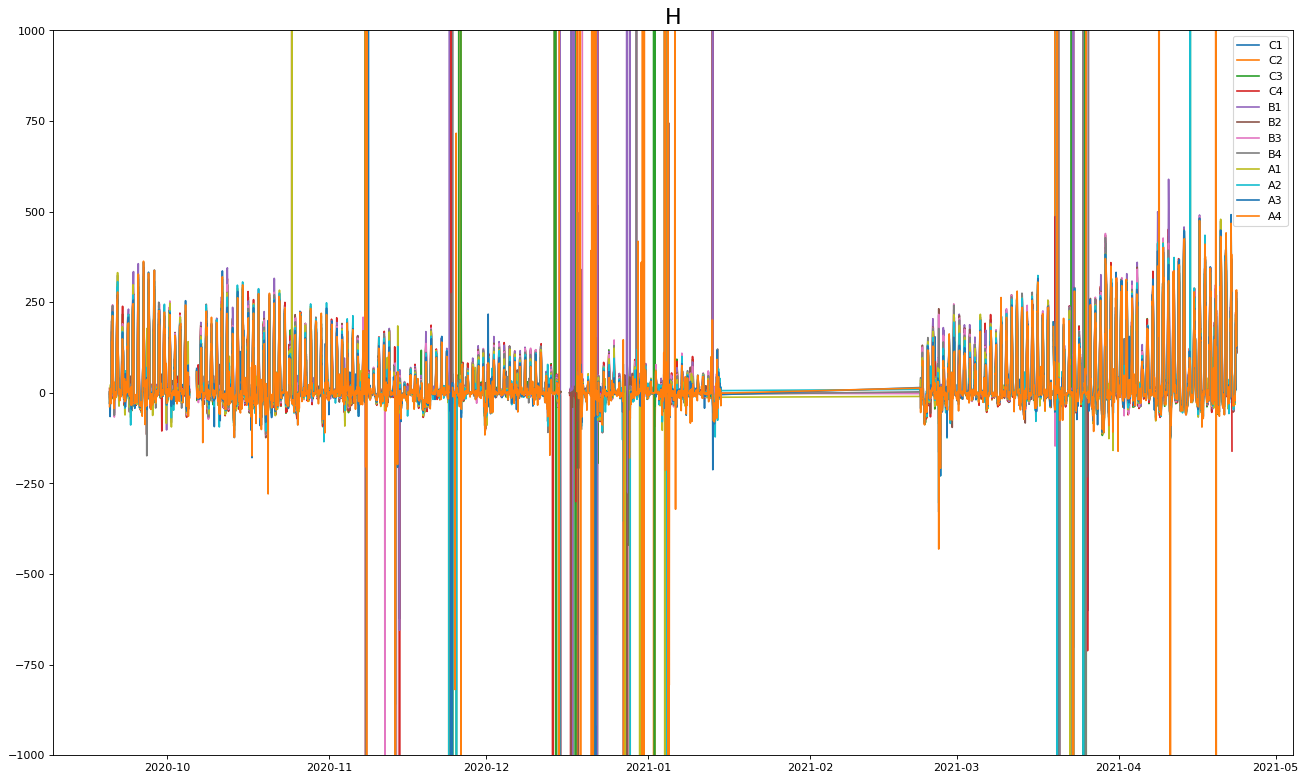

<Figure size 432x288 with 0 Axes>

In [83]:
plt.figure(figsize=(20, 12), dpi=80)
# a = TKE_df
plt.plot(H_df)
plt.legend(list_col)
plt.title("H",fontsize=20)
plt.ylim([-1000,1000])
plt.show()
# plt.savefig(OUT_DIRECTORY+'H.png')